In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
print('succes')

succes


# KONSEP VEKTOR YANG WAJIB DI PAKAI

Vektor adalah representasi fundamental dari semua data dalam ML/AI

# 1.1 Feature vector ( Vektor fitur )

konsep : representasi satu data point sebgai vektor numerik4

aplikasi :
- gambar 28x28 -> vektor 784 dimensi (MNIST)
- embedding teks -> vektor 768 dimensi (BERT)
- fitur tabular -> vektor n dimensi

original image shape (4, 4)
Feature Vector Shape (16,)
Feature Vector [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4]


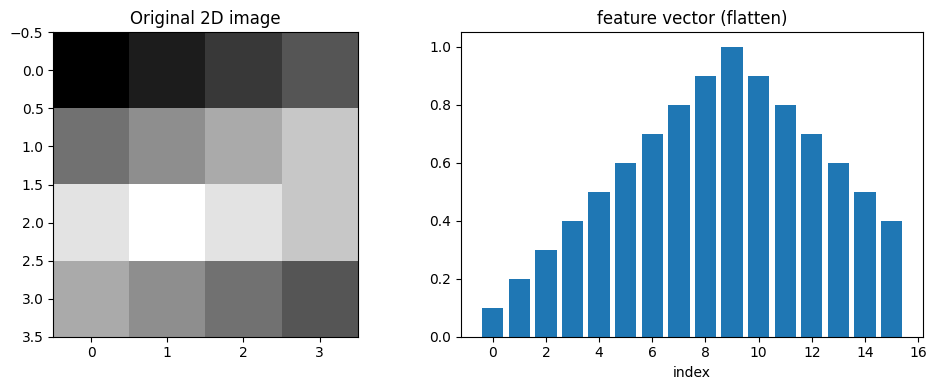

In [17]:
# contoh 1 : representasi gambar sebgai vektor
# simulasi gambar grayscale 4x4 (dalam praktik bisa 28x28 untuk MNIST)
image_2d = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8],
    [0.9, 1.0, 0.9, 0.8],
    [0.7, 0.6, 0.5, 0.4]
])

# flatten menjadi vektor 1d ( feeature vector )
feature_vector = image_2d.flatten()

print("original image shape", image_2d.shape)
print("Feature Vector Shape", feature_vector.shape)
print("Feature Vector", feature_vector)

# visualisasi
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].imshow(image_2d, cmap='gray')
axes[0].set_title('Original 2D image')
axes[1].bar(range(len(feature_vector)), feature_vector)
axes[1].set_title("feature vector (flatten)")
axes[1].set_xlabel('index')
plt.tight_layout()
plt.show()
    

In [27]:
# contoh 2 : feature vector dalam neural network ( word embedding)
# simulasi embedding untuk 3 kata
vocab = {'king':0, 'queen':1, 'man':2, 'woman':3}
embedding_dim = 4

# embedding matrix ( dalam praktik ini dipelajari oleh model )
embedding_matrix = np.array([
    [0.9, 0.1, 0.8, 0.2], # king
    [0.85, 0.15, 0.2, 0.8], # queen
    [0.7, 0.3, 0.9, 0.1], # man
    [0.65, 0.35, 0.1, 0.9] # woman
])

print("embedding matrix shape:", embedding_matrix.shape)
print("\nworld embedding:")
for word, idx in vocab.items():
    print(f" {word} : {embedding_matrix[idx]}")

# operasi famous : king - man + woman = queen
result = embedding_matrix[0] - embedding_matrix[2] + embedding_matrix[3]    
print(f"\nking - man + woman = {result}")
print(f"queen embedding = {embedding_matrix[1]}")

embedding matrix shape: (4, 4)

world embedding:
 king : [0.9 0.1 0.8 0.2]
 queen : [0.85 0.15 0.2  0.8 ]
 man : [0.7 0.3 0.9 0.1]
 woman : [0.65 0.35 0.1  0.9 ]

king - man + woman = [8.50000000e-01 1.50000000e-01 2.77555756e-17 1.00000000e+00]
queen embedding = [0.85 0.15 0.2  0.8 ]


---
## 1.2 Panjang Vektor (Norm)

**L2 Norm (Euclidean):** $||x||_2 = \sqrt{\sum_i x_i^2}$

**L1 Norm (Manhattan):** $||x||_1 = \sum_i |x_i|$

**Aplikasi:**
- Normalisasi data
- Regularization (L1 = Lasso, L2 = Ridge)
- Similarity calculation

In [42]:
# implementasi manual norm
def l1_norm(x):
    return np.sum(np.abs(x))

def l2_norm(x):
    return np.sqrt(np.sum(x**2))

# contoh vektor
v = np.array([3,-4,0])

print(f"vector v = {v}")
print(f"l1 norm (manual) : {l1_norm(v)}")
print(f"l1 norm (numpy) : {np.linalg.norm(v, ord=1)}")
print(f"l2 norm (normal) : {l2_norm(v)}")
print(f"l2 norm (numpy) : {np.linalg.norm(v, ord=2)}")

# aplikasi : normalisasi vektor ( unit vektor )
v_normalized = v / l2_norm(v)
print(f"\n normalized vector : {v_normalized}")
print(f"norm of normalized : {np.linalg.norm(v_normalized):.4f}")

vector v = [ 3 -4  0]
l1 norm (manual) : 7
l1 norm (numpy) : 7.0
l2 norm (normal) : 5.0
l2 norm (numpy) : 5.0

 normalized vector : [ 0.6 -0.8  0. ]
norm of normalized : 1.0000


In [53]:
# APLIKASI DALAM ML : ridge regression ( l2 regularization )
# loss = MSE + * ||w||²

def ridge_loss(X, y, w , lambda_reg=0.1):
    mse = np.mean((X @ w - y) ** 2 )
    l2_penalty = lambda_reg + np.sum(w ** 2)
    return mse + l2_penalty

#simulasi 
X = np.random.randn(100,5)
y = X @ np.array([1, 2, 0, -1, 0.5]) + np.random.randn(100) * 0.1
w = np.array([1.1, 1.9, 0.1, -0.9, 0.6])

print(f"mse only : {np.mean((X @ w - y) ** 2):.4f}")
print(f"Ridge Loss (λ=0.1): {ridge_loss(X, y, w, 0.1):.4f}")
print(f"Ridge Loss (λ=1.0): {ridge_loss(X, y, w, 1.0):.4f}")
print("\n💡 Lambda lebih besar = penalti lebih besar untuk weight besar")

mse only : 0.0594
Ridge Loss (λ=0.1): 6.1594
Ridge Loss (λ=1.0): 7.0594

💡 Lambda lebih besar = penalti lebih besar untuk weight besar


---
## 1.3 Dot Product (Hasil Kali Titik)

**Formula:** $a \cdot b = \sum_i a_i b_i = ||a|| \cdot ||b|| \cdot \cos(\theta)$

**Aplikasi Penting:**
- Cosine similarity
- Attention mechanism (Transformer)
- Linear/Logistic regression prediction

In [64]:
# implementasi dot product 
def dot_product(a,b):
    return np.sum(a * b )

a = np.array([1,2,3])
b = np.array([4,5,6])

print(f"a = {a}")
print(f"b = {b}")
print(f"dot product ( manualy ) {dot_product(a,b)}")
print(f"d0t product ( numpy ) : {np.dot(a,b)}")
print(f"dot product ( @ ) : {a @ b}") 

# interpretasi geometris
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
cos_theta = np.dot(a,b) / (norm_a * norm_b)
theta = np.arccos(cos_theta) * 180 / np.pi

print(f"\nAngle between vectors: {theta:.2f} degrees")

a = [1 2 3]
b = [4 5 6]
dot product ( manualy ) 32
d0t product ( numpy ) : 32
dot product ( @ ) : 32

Angle between vectors: 12.93 degrees


In [69]:
import numpy as np

# Panjang sequence = 4 token
# Dimensi embedding tiap token = d_k = 3
seq_len = 4
d_k = 3

# Q, K, V adalah matriks hasil transformasi embedding token
# Bentuk: (jumlah token, dimensi)
# Transformer selalu membentuk Q,K,V dari input token
Q = np.random.randn(seq_len, d_k)  # Query
K = np.random.randn(seq_len, d_k)  # Key
V = np.random.rand(seq_len, d_k)   # Value

# Attention Score = seberapa mirip tiap token dengan token lain
# Q @ K.T menghasilkan matrix 4x4:
#   baris i = query token i
#   kolom j = key token j
# Setiap nilai [i,j] = dot product Query_i dan Key_j
attention_scores = Q @ K.T
print("attention scores (Q @ K.T):")
print(attention_scores)

# Softmax untuk mengubah skor menjadi probabilitas perhatian
# Substract max untuk menjaga stabilitas numerik (menghindari overflow exp)
def softmax(x, axis=-1):
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

# Scale dengan sqrt(d_k) karena dot product cenderung besar kalau dimensi besar
# Pembagian ini bikin training lebih stabil
attention_weight = softmax(attention_scores / np.sqrt(d_k))
print("\nAttention weights (after softmax):")
print(attention_weight)

# Output = weighted sum of V
# Tiap token mengambil informasi dari semua token lain,
# tapi bobotnya mengikuti attention weight baris tersebut.
# Bentuk hasil = (4, 3), sama seperti V
output = attention_weight @ V
print("\noutput:")
print(output)


atetntion scores ( Q @ K.T) :
[[-0.5104801  -1.64692096 -1.6451526  -0.84334378]
 [ 0.35292933  2.30128609  1.11029056  0.76880673]
 [ 1.29600364  3.03532658  3.95204983  3.99734384]
 [-0.12082594 -2.71067659 -0.55353838  1.20036831]]

 Attention weights ( after softmax ) :
[[0.34923446 0.1812032  0.1813883  0.28817403]
 [0.14493366 0.44637546 0.22442439 0.1842665 ]
 [0.07621397 0.20804269 0.35319267 0.36255067]
 [0.24111594 0.05405634 0.18781383 0.51701389]]

output
[[0.45964015 0.54869893 0.52600198]
 [0.6298091  0.39031753 0.555929  ]
 [0.62868019 0.47844264 0.43630768]
 [0.46079042 0.57502093 0.36879626]]


---
## 1.4 Cosine Similarity

**Formula:** $\cos(\theta) = \frac{a \cdot b}{||a|| \cdot ||b||}$

**Aplikasi:**
- Recommendation System
- Semantic Search
- Document/Text Similarity

In [70]:
# implenetasi cosine similiarity
def cosine_sim(a,b):
    return np.dot(a,b) / np.linalg.norm(a) * np.linalg.norm(b)

# contoh : documente similiarity
# simulasi TF-IDF vector untuk 3 dokumen
doc1 = np.array([1,1,1,0,0]) # 'machine learning is great'
doc2 = np.array([1,1,0,1,0]) # 'machine learning rocks'
doc3 = np.array([0,0,0,0,1]) # "cooking recipes"

print("document similiarity matrix:")
docs  = [doc1, doc2, doc3]
for i, di in enumerate(docs):
    for j, dj in enumerate(docs):
        sim = cosine_sim(di,dj)
        print(f"doc{i+1} vs doc{j+1} : {sim:.3f}", end=" ")
    print()
print("\n Doc1 dan Doc2 mirip (0.816), Doc3 sangat berbeda (0.0)")

document similiarity matrix:
doc1 vs doc1 : 3.000 doc1 vs doc2 : 2.000 doc1 vs doc3 : 0.000 
doc2 vs doc1 : 2.000 doc2 vs doc2 : 3.000 doc2 vs doc3 : 0.000 
doc3 vs doc1 : 0.000 doc3 vs doc2 : 0.000 doc3 vs doc3 : 1.000 

💡 Doc1 dan Doc2 mirip (0.816), Doc3 sangat berbeda (0.0)


In [75]:
# aplikasi : sismple recomendation system
# user- item rating matrrix

users = ['alice', 'bob', 'charlie']
items = ['movie1', 'movie2', 'movie3', 'movie4']

# rating matrix  ( rows= user, cols=item)
ratings = np.array([
    [5,4,1,0], # alice
    [4,5,1,1], # bob
    [1,1,5,4], # charlie
])

# find similiar users using cosine similiariity
print("user similiarity:")
for i in range(len(users)):
    for j in range(len(users)):
        sim = cosine_sim(ratings[i], ratings[j])
        print(f"{users[i]} vs {users[j]} : {sim:.3f}")
    print()

# recomend items to alies bsed on similiar user (bob)
alice_unrated = np.where(ratings[0] == 0) [0]
print(f"\n alice belum rating : {[items[i] for i in alice_unrated]}")
print(f"Bob rating untuk item tersebut: {ratings[1][alice_unrated]}")
print(" Recommend Movie4 to Alice based on Bob's rating!")

user similiarity:
alice vs alice : 42.000
alice vs bob : 41.485
alice vs charlie : 14.166

bob vs alice : 40.520
bob vs bob : 43.000
bob vs charlie : 18.000

charlie vs alice : 13.836
charlie vs bob : 18.000
charlie vs charlie : 43.000


 alice belum rating : ['movie4']
Bob rating untuk item tersebut: [1]
💡 Recommend Movie4 to Alice based on Bob's rating!


---
## 1.5 Projection (Proyeksi Vektor)

**Formula:** $\text{proj}_b a = \frac{a \cdot b}{||b||^2} b$

**Aplikasi:**
- PCA (Principal Component Analysis)
- Orthogonal decomposition
- Gradient direction analysis

a [3 4]
b [1 0]
projection of a onto b = [3. 0.]


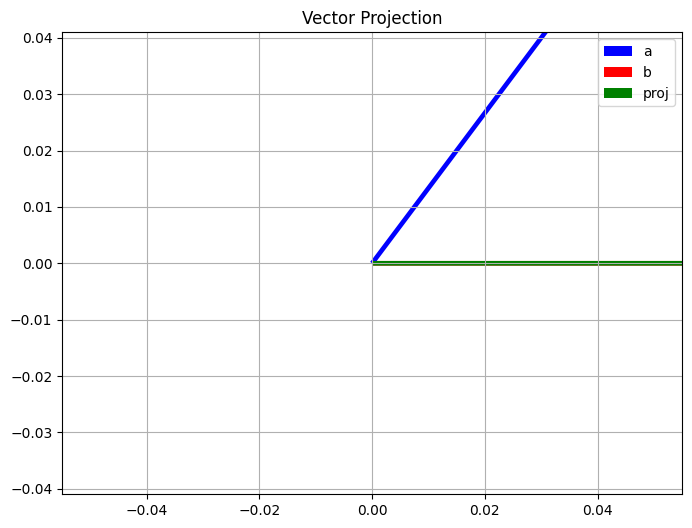

In [82]:
# implementasi projection
def project(a,b):
    return (np.dot(a,b) / np.dot(b,b)) * b

a = np.array([3,4])
b = np.array([1,0])

proj = project(a,b)
print(f"a {a}")
print(f"b {b}")
print(f"projection of a onto b = {proj}")

# visualisasi 
plt.figure(figsize=(8,6))
plt.quiver(0,0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='a')
plt.quiver(0,0, b[0]*4, b[1], angles='xy', scale_units='xy', scale=1,color='red', label='b')
plt.quiver(0,0, proj[0], proj[1], angles='xy', scale_units='xy', scale=1, color='green', label='proj')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.legend()
plt.title('Vector Projection')
plt.axis('equal')
plt.show()